In [1]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import glob
import os

import cv2
import matplotlib.pyplot as plt

import pickle
import time

%matplotlib inline

Using TensorFlow backend.


In [2]:
cats_path = 'processed_train_data/cats'
cats_files = glob.glob(os.path.join(cats_path, "*"))

In [3]:
dogs_path = 'processed_train_data/dogs'
dogs_files = glob.glob(os.path.join(dogs_path, "*"))

In [5]:
dogs = [
 'n02085620','n02085782','n02085936','n02086079'
,'n02086240','n02086646','n02086910','n02087046'
,'n02087394','n02088094','n02088238','n02088364'
,'n02088466','n02088632','n02089078','n02089867'
,'n02089973','n02090379','n02090622','n02090721'
,'n02091032','n02091134','n02091244','n02091467'
,'n02091635','n02091831','n02092002','n02092339'
,'n02093256','n02093428','n02093647','n02093754'
,'n02093859','n02093991','n02094114','n02094258'
,'n02094433','n02095314','n02095570','n02095889'
,'n02096051','n02096177','n02096294','n02096437'
,'n02096585','n02097047','n02097130','n02097209'
,'n02097298','n02097474','n02097658','n02098105'
,'n02098286','n02098413','n02099267','n02099429'
,'n02099601','n02099712','n02099849','n02100236'
,'n02100583','n02100735','n02100877','n02101006'
,'n02101388','n02101556','n02102040','n02102177'
,'n02102318','n02102480','n02102973','n02104029'
,'n02104365','n02105056','n02105162','n02105251'
,'n02105412','n02105505','n02105641','n02105855'
,'n02106030','n02106166','n02106382','n02106550'
,'n02106662','n02107142','n02107312','n02107574'
,'n02107683','n02107908','n02108000','n02108089'
,'n02108422','n02108551','n02108915','n02109047'
,'n02109525','n02109961','n02110063','n02110185'
,'n02110341','n02110627','n02110806','n02110958'
,'n02111129','n02111277','n02111500','n02111889'
,'n02112018','n02112137','n02112350','n02112706'
,'n02113023','n02113186','n02113624','n02113712'
,'n02113799','n02113978']

cats=['n02123045','n02123159','n02123394','n02123597','n02124075','n02125311','n02127052']

In [6]:
model = ResNet50(weights='imagenet')
def predict_img(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    #print('Predicted:', decode_predictions(preds, top=3)[0])
    return preds
#preds_cat = predict_img(cats_files[1])

对文件中的物体进行预测，并导出pickle文件

In [13]:
cats_pred ={}
i = 0 
t1 = time.time()
for file in cats_files:
    pred = predict_img(file)
    cats_pred[file] = pred
    if i%500==0:
        print (i)  #显示进度
    i+=1 
t2 = time.time()
print(t2-t1)
with open('prediction/train_cats_pred.pkl', 'wb') as file:
    pickle.dump(cats_pred, file)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000


In [15]:
dogs_pred ={}
for file in dogs_files:
    pred = predict_img(file)
    dogs_pred[file] = pred
    
with open('prediction/train_dogs_pred.pkl', 'wb') as file:
    pickle.dump(dogs_pred, file)

In [8]:
cats_pred ={}
with open('prediction/train_cats_pred.pkl', 'rb') as file:
    cats_pred = pickle.load(file)

In [9]:
dogs_pred ={}
with open('prediction/train_dogs_pred.pkl', 'rb') as file:
    dogs_pred = pickle.load(file)

In [141]:
cats_top = {}
for k in cats_pred:
    preds = (cats_pred[k])
    decode_preds = decode_predictions(preds, top=100)[0]
    pred_dict = {}
    for dic in decode_preds:
        pred_dict[dic[0]] = dic[2]
    cats_top[k] = pred_dict

In [142]:
abnormal_cats = []
i = 0
for file in cats_top:
    dic = {}
    prob = 0.0
    for mark in cats_top[file]: 
        if mark in cats:
            prob = prob + cats_top[file][mark]
    if prob == 0:
        dic[file] = prob
        abnormal_cats.append(dic)
    i += 1
    """
    if i >100:
        break     
    """

In [143]:
print (len(abnormal_cats))

48


In [144]:
dogs_top = {}
for k in dogs_pred:
    preds = (dogs_pred[k])
    decode_preds = decode_predictions(preds, top=50)[0]
    pred_dict = {}
    for dic in decode_preds:
        pred_dict[dic[0]] = dic[2]
    dogs_top[k] = pred_dict

In [145]:
abnormal_dog = []
i = 0
for file in dogs_top:
    dic = {}
    prob = 0.0
    for mark in dogs_top[file]: 
        if mark in dogs:
            prob = prob + dogs_top[file][mark]
    if prob == 0:
        dic[file] = prob
        abnormal_dog.append(dic)
    i += 1
    """
    if i >100:
        break     
    """

In [146]:
print(len(abnormal_dog))

25


In [147]:
def showimgs(imgs,titles):
    col = len(imgs)
    for i in range(col):
        plt.subplot(1,col,i+1)
        plt.imshow(imgs[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

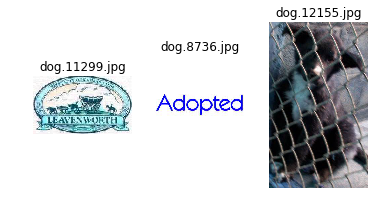

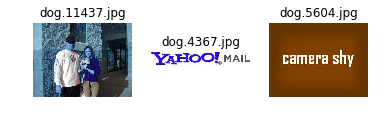

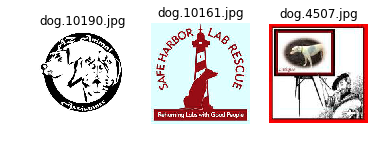

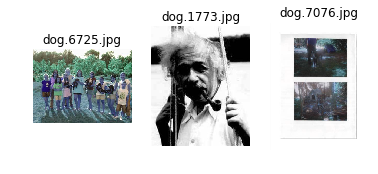

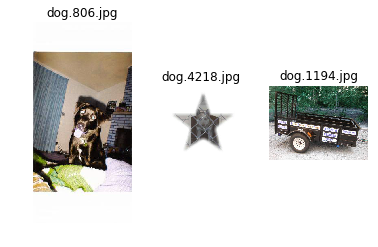

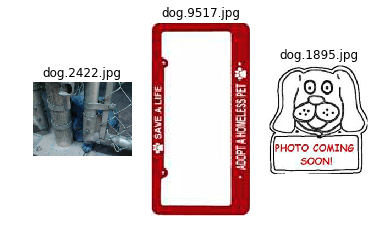

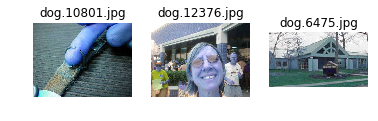

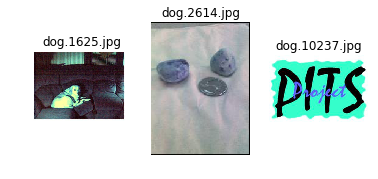

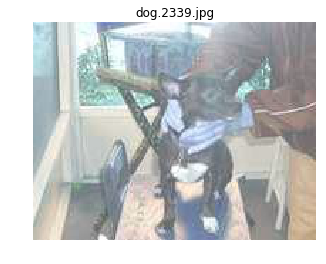

In [148]:
i=0
l=0
col = 3
imgs = []
titles = []
for dic in abnormal_dog:
    file = list(dic.keys())[0]
    title = file.rsplit('/',1)[1] #去掉路径，获取文件名
    img = cv2.imread(file)
    imgs.append(img)
    titles.append(title)
    i = i+1
    l = l+1
    if i%col ==0:
        showimgs(imgs,titles)
        i = 0
        imgs = []
        titles = []
    elif l == len(abnormal_dog):
        showimgs(imgs,titles)

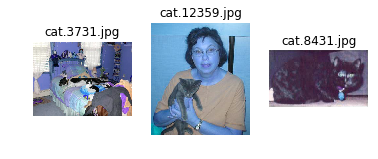

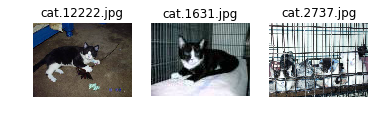

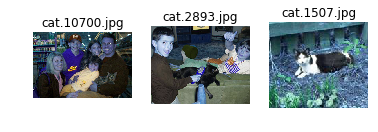

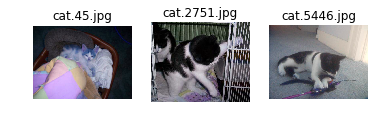

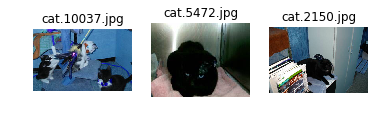

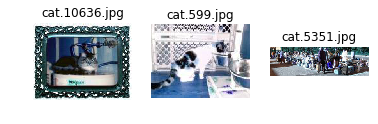

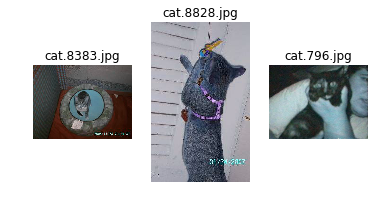

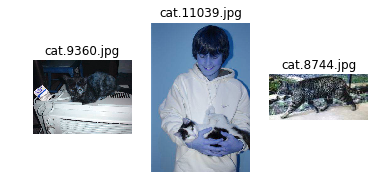

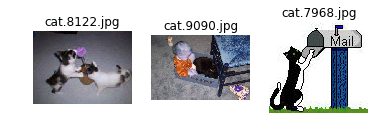

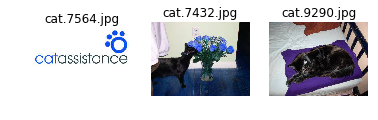

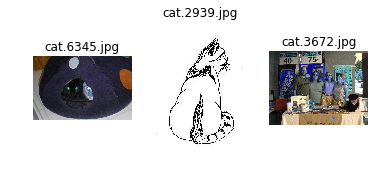

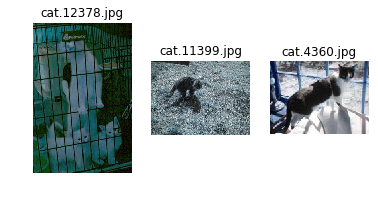

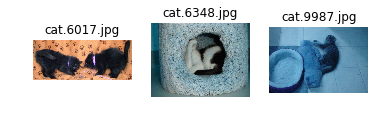

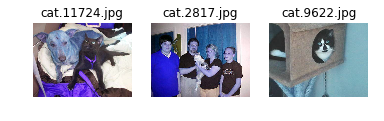

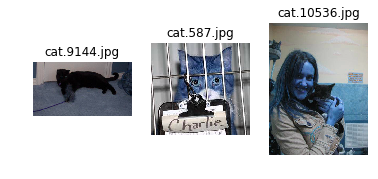

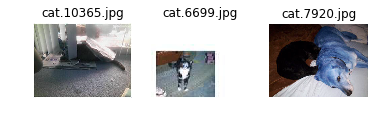

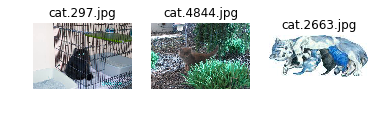

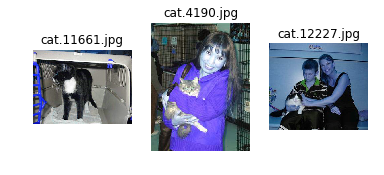

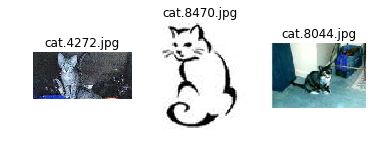

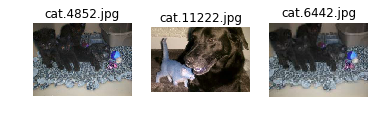

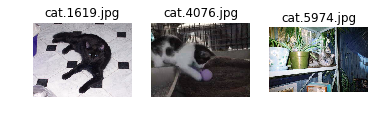

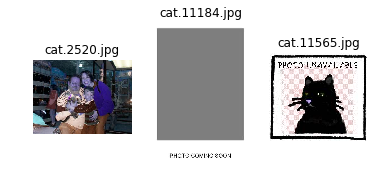

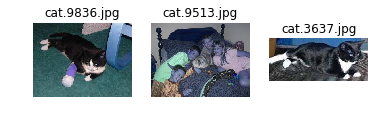

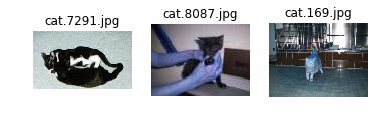

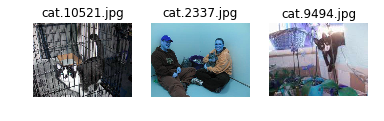

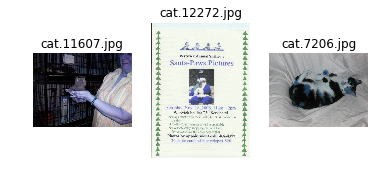

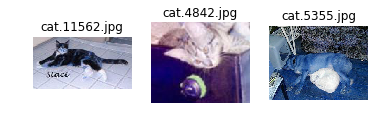

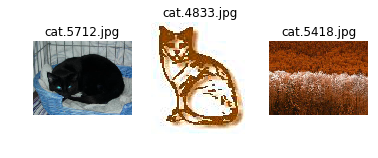

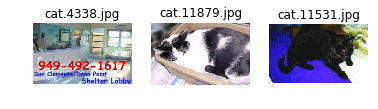

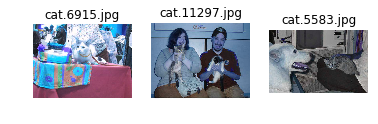

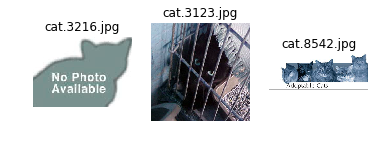

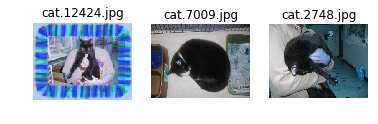

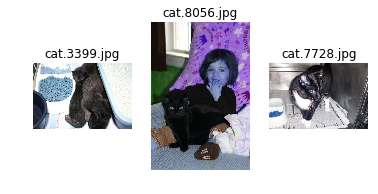

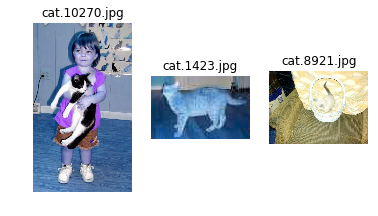

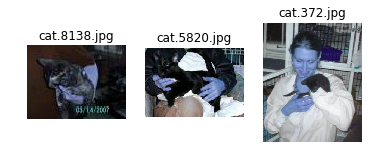

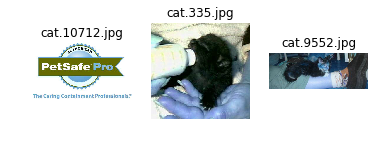

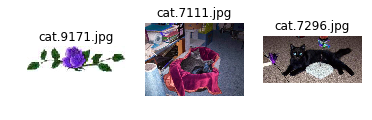

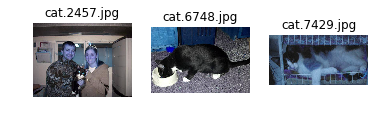

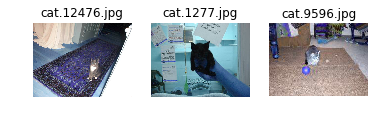

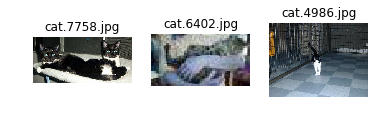

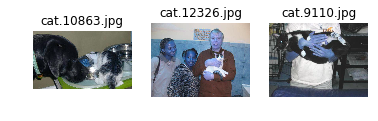

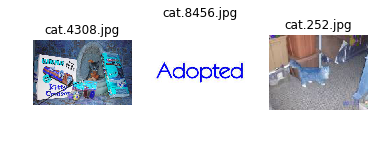

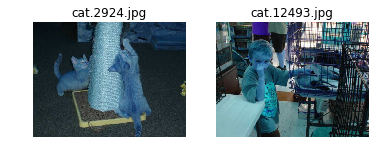

In [140]:
i=0
l=0
col = 3
imgs = []
titles = []
for dic in abnormal_cats:
    file = list(dic.keys())[0]
    title = file.rsplit('/',1)[1] #去掉路径，获取文件名
    img = cv2.imread(file)
    imgs.append(img)
    titles.append(title)
    i = i+1
    l = l+1
    if i%col ==0:
        showimgs(imgs,titles)
        i = 0
        imgs = []
        titles = []
    elif l == len(abnormal_cats):
        showimgs(imgs,titles)